# DACON_컴퓨터비전학습경진대회 연습
## 정확도 90%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [2]:
# GPU 사용을 위한 코드
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [3]:
# Load Data
train = pd.read_csv('D:/DACON_MNIST/data/train.csv')
test = pd.read_csv('D:/DACON_MNIST/data/test.csv')

In [4]:
# train data는 id, digit, letter, pixel 로 구성되어 있다.
print(train.head(5))
# test data는 id, letter, pixel로 구성되어 있다.
print(test.head(5))
# submission은 id와 digit로 구성되어 있다.
print(len(train))
print(len(test))

   id  digit letter  0  1  2  3  4  5  6  ...  774  775  776  777  778  779  \
0   1      5      L  1  1  1  4  3  0  0  ...    2    1    0    1    2    4   
1   2      0      B  0  4  0  0  4  1  1  ...    0    3    0    1    4    1   
2   3      4      L  1  1  2  2  1  1  1  ...    3    3    3    0    2    0   
3   4      9      D  1  2  0  2  0  4  0  ...    3    3    2    0    1    4   
4   5      6      A  3  0  2  4  0  3  0  ...    4    4    3    2    1    3   

   780  781  782  783  
0    4    4    3    4  
1    4    2    1    2  
2    3    0    2    2  
3    0    0    1    1  
4    4    3    1    2  

[5 rows x 787 columns]
     id letter  0  1  2  3  4  5  6  7  ...  774  775  776  777  778  779  \
0  2049      L  0  4  0  2  4  2  3  1  ...    2    0    4    2    2    4   
1  2050      C  4  1  4  0  1  1  0  2  ...    0    3    2    4    2    4   
2  2051      S  0  4  0  1  3  2  3  0  ...    1    3    2    0    3    2   
3  2052      K  2  1  3  3  3  4  3  0  ...    3 

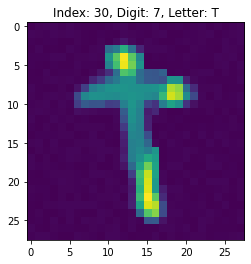

In [5]:
# train 데이터에 있는 이미지 출력해보기(Index에 있는 이미지, 이미지에 해당하는 숫자와 문자)
idx = 30
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# 사용하지 않는 column 정보들은 drop한다. (train, test)
x_train2 = train.drop(['id', 'digit', 'letter'], axis=1).values
y_train2 = train['digit']
print(x_train2.shape)
print(y_train2.shape)

# x_train과 y_train 값을 train, validation set으로 나눈다.
x_train2, x_valid2, y_train2, y_valid2 = train_test_split(x_train2, y_train2, test_size=0.33)
print(x_train2.shape)
print(x_valid2.shape)
print(y_train2.shape)
print(y_valid2.shape)

# train 이미지를 reshape 해준다.
x_train2 = x_train2.reshape(-1, 28, 28, 1)
x_valid2 = x_valid2.reshape(-1, 28, 28, 1)

# train 이미지를 normalization 해준다.
x_train2 = x_train2/255
x_valid2 = x_valid2/255

# y값들은 one_hot encoding 해준다.
y_train2 = to_categorical(y_train2, 10)
y_valid2 = to_categorical(y_valid2, 10)

(2048, 784)
(2048,)
(1372, 784)
(676, 784)
(1372,)
(676,)


Using TensorFlow backend.


In [8]:
from keras.layers import *
from keras import Sequential

model = Sequential()
    
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
    
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.3))
    
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(5,5),activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.3))
    
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)      

In [9]:
# 모델 compile(loss, optimizer 등 설정)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 훈련시키면서 가장 정확도가 높은 모델 저장하는 방법 : ModelCheckpoint
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

reLR = ReduceLROnPlateau(patience=50,verbose=1,factor=0.5) #learning rate scheduler
es = EarlyStopping(patience=100, verbose=1)
checkpointer = ModelCheckpoint(filepath='D:/DACON_MNIST/data/model.weights.best.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train2,
          y_train2,
          batch_size=32,
          epochs=200,
          validation_data=(x_valid2, y_valid2),
          callbacks=[checkpointer,es,reLR])


Train on 1372 samples, validate on 676 samples
Epoch 1/200
1372/1372 [==============================] - 12s 9ms/step - loss: 2.9748 - accuracy: 0.1334 - val_loss: 2.3721 - val_accuracy: 0.1050

Epoch 00001: val_loss improved from inf to 2.37211, saving model to D:/DACON_MNIST/data/model.weights.best.hdf5
Epoch 2/200
1372/1372 [==============================] - 11s 8ms/step - loss: 2.6079 - accuracy: 0.1574 - val_loss: 2.7973 - val_accuracy: 0.1050

Epoch 00002: val_loss did not improve from 2.37211
Epoch 3/200
1372/1372 [==============================] - 11s 8ms/step - loss: 2.3203 - accuracy: 0.2179 - val_loss: 3.4361 - val_accuracy: 0.1050

Epoch 00003: val_loss did not improve from 2.37211
Epoch 4/200
1372/1372 [==============================] - 11s 8ms/step - loss: 2.1061 - accuracy: 0.2901 - val_loss: 4.6995 - val_accuracy: 0.1050

Epoch 00004: val_loss did not improve from 2.37211
Epoch 5/200
1372/1372 [==============================] - 12s 9ms/step - loss: 1.9478 - accuracy: 0.


Epoch 00037: val_loss did not improve from 0.55912
Epoch 38/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.3056 - accuracy: 0.8972 - val_loss: 0.5413 - val_accuracy: 0.8195

Epoch 00038: val_loss improved from 0.55912 to 0.54125, saving model to D:/DACON_MNIST/data/model.weights.best.hdf5
Epoch 39/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.2773 - accuracy: 0.9191 - val_loss: 0.5995 - val_accuracy: 0.7944

Epoch 00039: val_loss did not improve from 0.54125
Epoch 40/200
1372/1372 [==============================] - 12s 9ms/step - loss: 0.2600 - accuracy: 0.9162 - val_loss: 0.7367 - val_accuracy: 0.7589

Epoch 00040: val_loss did not improve from 0.54125
Epoch 41/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.2683 - accuracy: 0.9038 - val_loss: 0.5656 - val_accuracy: 0.8033

Epoch 00041: val_loss did not improve from 0.54125
Epoch 42/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.2460 -

1372/1372 [==============================] - 11s 8ms/step - loss: 0.0920 - accuracy: 0.9738 - val_loss: 0.5874 - val_accuracy: 0.8565

Epoch 00077: val_loss did not improve from 0.47066
Epoch 78/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.1050 - accuracy: 0.9665 - val_loss: 0.4973 - val_accuracy: 0.8609

Epoch 00078: val_loss did not improve from 0.47066
Epoch 79/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.1282 - accuracy: 0.9599 - val_loss: 0.6030 - val_accuracy: 0.8462

Epoch 00079: val_loss did not improve from 0.47066
Epoch 80/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.1168 - accuracy: 0.9614 - val_loss: 0.5273 - val_accuracy: 0.8565

Epoch 00080: val_loss did not improve from 0.47066
Epoch 81/200
1372/1372 [==============================] - 12s 8ms/step - loss: 0.0947 - accuracy: 0.9687 - val_loss: 0.5528 - val_accuracy: 0.8506

Epoch 00081: val_loss did not improve from 0.47066
Epoch 82/200
1372/

1372/1372 [==============================] - 18s 13ms/step - loss: 0.0691 - accuracy: 0.9818 - val_loss: 0.5914 - val_accuracy: 0.8609

Epoch 00117: val_loss did not improve from 0.45702
Epoch 118/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.5127 - val_accuracy: 0.8817

Epoch 00118: val_loss did not improve from 0.45702
Epoch 119/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.0577 - accuracy: 0.9789 - val_loss: 0.4919 - val_accuracy: 0.8698

Epoch 00119: val_loss did not improve from 0.45702
Epoch 120/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.0651 - accuracy: 0.9774 - val_loss: 0.5101 - val_accuracy: 0.8654

Epoch 00120: val_loss did not improve from 0.45702
Epoch 121/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.6487 - val_accuracy: 0.8624

Epoch 00121: val_loss did not improve from 0.45702
Epoch 122/200

1372/1372 [==============================] - 11s 8ms/step - loss: 0.0610 - accuracy: 0.9789 - val_loss: 0.6697 - val_accuracy: 0.8447

Epoch 00158: val_loss did not improve from 0.45702
Epoch 159/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.0412 - accuracy: 0.9832 - val_loss: 0.5949 - val_accuracy: 0.8654

Epoch 00159: val_loss did not improve from 0.45702
Epoch 160/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.0391 - accuracy: 0.9854 - val_loss: 0.5905 - val_accuracy: 0.8595

Epoch 00160: val_loss did not improve from 0.45702
Epoch 161/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.0590 - accuracy: 0.9789 - val_loss: 0.6504 - val_accuracy: 0.8373

Epoch 00161: val_loss did not improve from 0.45702

Epoch 00161: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 162/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.5253 - val_ac


Epoch 00198: val_loss did not improve from 0.45702
Epoch 199/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.5326 - val_accuracy: 0.8876

Epoch 00199: val_loss did not improve from 0.45702
Epoch 200/200
1372/1372 [==============================] - 11s 8ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0.5439 - val_accuracy: 0.8891

Epoch 00200: val_loss did not improve from 0.45702


In [12]:
# 학습 진행한 결과 모델 저장하기
from keras.models import load_model

model.save('D:/DACON_MNIST/data/DACON_mnist_model1.h5')

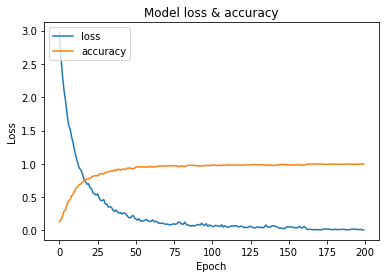

[0.99489796, 0.9963557, 0.99271137, 0.9978134, 0.9978134]


In [15]:
# 모델 학습 결과 그래프로 확인하기
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [16]:
# test 데이터셋에서 x_train과 동일한 조건으로 예측 실행
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

# submission의 'digit'에 예측한 결과값을 적어줌
submission = pd.read_csv('D:/DACON_MNIST/data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3


In [17]:
# 결과를 csv파일로 저장함
submission.to_csv('D:/DACON_MNIST/data/DACON_MNIST_02.csv', index=False)